In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from stemming.lovins import stem as  lovins_stemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [201]:
stop_words = stopwords.words('english')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...


True

In [132]:
# Read data
df = pd.read_csv('Articles.csv',encoding='latin1')

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Article   2692 non-null   object
 1   Date      2692 non-null   object
 2   Heading   2692 non-null   object
 3   NewsType  2692 non-null   object
dtypes: object(4)
memory usage: 84.3+ KB


In [134]:
# Check for duplicated instances
df.duplicated().sum()

107

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.isnull().sum()

Article     0
Date        0
Heading     0
NewsType    0
dtype: int64

In [137]:
# Extract some common feature
# place,strong,

In [138]:
# We need remove the strong key word init , it's coming from the html code
df['Article'] = df['Article'].str.replace('<?strong>','',regex=True)

<Axes: xlabel='NewsType'>

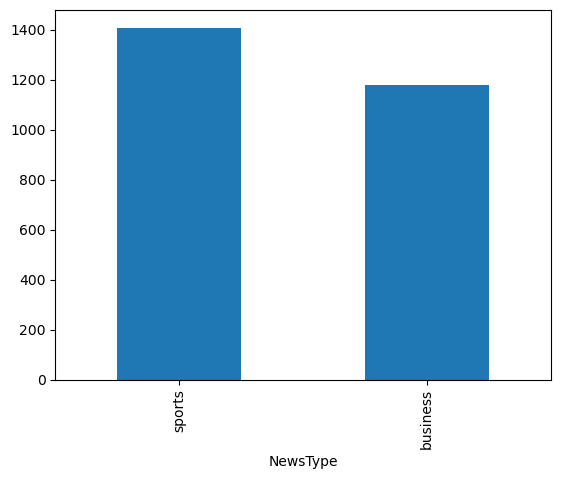

In [146]:
# Analyse target column
df['NewsType'].value_counts().plot(kind='bar')

In [156]:
# Dropping the date columns
df.drop(columns='Date',inplace=True)

In [177]:
# preproccess the text
df['Article'] = df['Article'].str.replace('[^\w\s]','',regex=True)
df['Heading'] = df['Heading'].str.replace('[^\w\s]','',regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_3208\1432907355.py:2: SyntaxWarning: invalid escape sequence '\w'
  df['Article'] = df['Article'].str.replace('[^\w\s]','',regex=True)


In [220]:
lemma = WordNetLemmatizer()
stem  = PorterStemmer()
def preprocess(text):
    text = text.lower()
    token_words = [stem.stem(lemma.lemmatize(word)) for word in word_tokenize(text) if word not in stop_words]
    text = ' '.join(token_words)
    
    return text

In [223]:
df['Article'] = df['Article'].apply(preprocess)

In [224]:
df['Heading'] = df['Heading'].apply(preprocess)

In [226]:
df['Document'] = df['Heading']+' '+df['Article']

In [227]:
df['Document']

0       sindh govt decid cut public transport fare 7pc...
1       asia stock new year trad hong kong asian marke...
2       hong kong stock open 0.66 percent lower hong k...
3       asian stock sink euro near nine year hong kong...
4       u oil price slip 50 barr new york u oil price ...
                              ...                        
2669    laptop ban hit dubai 11m weekend travel dubai ...
2670    pak china relat third countri shaukat aziz bei...
2671    uber ground self drive car accid washington ub...
2690    new develop bank plan joint invest economi alo...
2691    googl power startup weekend energ proud pakist...
Name: Document, Length: 2585, dtype: object

In [235]:
df = df[['Document','NewsType']]

In [238]:
X = df['Document']
y = df['NewsType'].eq('business').astype(int)

In [255]:
cv_vect = CountVectorizer(max_features=1500,ngram_range=(1,2),)

In [256]:
pd.DataFrame(cv_vect.fit_transform(X).toarray(),columns=cv_vect.get_feature_names_out())

,01,01 percent,02,02 percent,10,10 percent,100,11,12,13,...,yen,yet,yield,york,young,youni,yuan,zalmi,zealand,zimbabw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,5,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2580,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2582,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
from sklearn.model_selection import train_test_split,cross_val_score

In [262]:
X_train, X_test, y_train, y_test = train_test_split(cv_vect.fit_transform(X).toarray(),y,random_state=42,test_size=.2)

In [269]:
dt = DecisionTreeClassifier()

In [270]:
cross_val_score(dt,X=X_train,y=y_train,cv=2)

array([0.9410058 , 0.95261122])

In [273]:
def model_perf(model):
    print(cross_val_score(model,X=X_train,y=y_train,cv=2))

In [285]:
model_perf(GradientBoostingClassifier())

[0.99226306 0.98742747]


In [280]:
rf_model = RandomForestClassifier(max_depth=20,min_samples_split=20)

In [281]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=20)

In [287]:
y_pred = rf_model.predict(X_test)

In [292]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [289]:
accuracy_score(y_test,y_pred)

0.9806576402321083

In [291]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       276
           1       0.98      0.98      0.98       241

    accuracy                           0.98       517
   macro avg       0.98      0.98      0.98       517
weighted avg       0.98      0.98      0.98       517



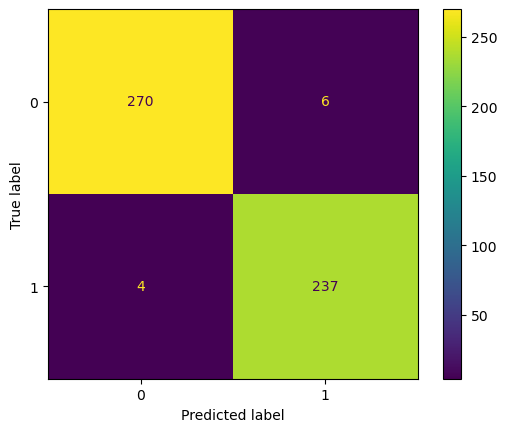

In [293]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)